In [23]:
from skimage import data, img_as_float, img_as_ubyte
import matplotlib.pyplot as plt
import cv2
import warnings
 
warnings.filterwarnings('ignore')

In [24]:
def show2imgs(im1, im2, title1='Obraz pierwszy', title2='Obraz drugi', size=(10,10)):
 
    f, (ax1, ax2) = plt.subplots(1,2, figsize=size)
    ax1.imshow(im1, cmap='gray')
    ax1.axis('off')
    ax1.set_title(title1)
 
    ax2.imshow(im2, cmap='gray')
    ax2.axis('off')
    ax2.set_title(title2)
    plt.show() 

In [25]:
img = data.coins()

imf = img_as_float(img)
print(imf.shape, imf.dtype)
 
imf = img_as_ubyte(imf)
print(imf.shape, imf.dtype)
 
bimf = cv2.blur(imf,  (3,3))

(303, 384) float64
(303, 384) uint8


In [26]:
def moja_funkcja(img, blur_size):
    blur = blur_size #rozmiar blur
    img_kopia = img[:][:] #kopia obrazu

    for x in range(0, img.shape[0]-blur[0]):
 
        for y in range(0, img.shape[1]-blur[1]): 
            avg = 0 
            
            for xp in range(blur[0]):
                for yp in range(blur[1]):
                    avg+=img[x+xp][y+yp]
            avg = avg/(blur[0]*blur[1])
            img_kopia[x][y]=avg
    return img_kopia

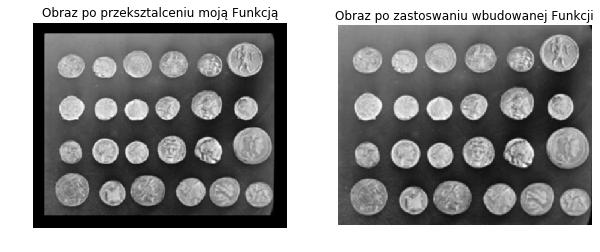

In [27]:
size = 20
imf = cv2.copyMakeBorder(imf, size, size, size, size, cv2.BORDER_CONSTANT, 255)#dodanie ramki powoduje to że ten filtr nie modyfikuje ostatnich pikseli tej ramki za to modyfikuje wszystkie piksele obrazka
moj_img = moja_funkcja(imf, (3,3))
 
show2imgs(moj_img, bimf, title1='Obraz po przeksztalceniu moją Funkcją', title2='Obraz po zastoswaniu wbudowanej Funkcji', size=(10,10))